### Introduction
Our final project consist of four datasets, the 2019 regular season MLB pitching stats and hitting stats (This is our training data). We also bring in the current 2020 regular season MLB pitching and hitting stats (this is our testing data).

### About the data
- four dataset: 2019 MLB hitting and pitching, 2020 MLB hitting and pitching
- All datasets were pulled from [baseball-reference.com](https://www.baseball-reference.com/)

## Project Overview

In this project, we will build a model to predict weather or not a team has good pitchers or not based ERA, HR/9, WHIP. To accomplish this I will compare 3 classifier models:

- Logistical Regression
- Decision Tree
- Random Forest

Each model will be evaluated based on F1 score

#### Why use F1 score?

The F1 score enables us to take into account false negatives and false positives when calculating the accuracy of a model. If we use the generic accuracy_score method, false positives would be considered as correct predictions which is something that is inaccurate and would mislead me into thinking my model is more accurate than it is.



In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read-in 2019 Pitching Data
df = pd.read_csv('./mlb-pitching-2019.csv')

df.head()

,Tm,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,GF,CG,tSho,cSho,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB
0,ARI,27,28.6,4.59,85,77,0.525,4.25,162,162,162,0,11.0,0.0,45,1465.0,1400,743,691,220,516,38,1427,62,4,49,6230,106,4.40,1.308,8.6,1.4,3.2,8.8,2.77,1092
1,ATL,32,27.5,4.59,97,65,0.599,4.19,162,162,161,1,8.0,0.0,44,1450.2,1421,743,675,203,548,33,1393,69,3,70,6243,110,4.39,1.357,8.8,1.3,3.4,8.6,2.54,1148
2,BAL,39,27.3,6.06,54,108,0.333,5.59,162,162,162,0,5.0,0.0,27,1443.0,1544,981,897,305,561,11,1248,80,6,75,6396,83,5.56,1.459,9.6,1.9,3.5,7.8,2.22,1086
3,BOS,28,29.0,5.11,84,78,0.519,4.70,162,162,161,1,8.0,1.0,33,1471.0,1423,828,768,215,605,22,1633,76,6,81,6400,103,4.28,1.379,8.7,1.3,3.7,10.0,2.70,1159
4,CHC,33,31.1,4.43,84,78,0.519,4.10,162,162,161,1,10.0,1.0,38,1442.0,1376,717,657,195,534,16,1444,80,1,60,6190,108,4.25,1.325,8.6,1.2,3.3,9.0,2.70,1147


In [3]:
#Describe Data
df.describe()

,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,GF,CG,tSho,cSho,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,30.000000,30.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,56.156250,28.384375,4.830938,154.343750,154.343750,0.499937,4.496562,308.687500,308.687500,305.812500,2.875000,8.933333,0.866667,74.968750,2759.009375,2671.218750,1491.125000,1377.843750,430.562500,1010.00000,47.843750,2721.031250,126.062500,9.71875,113.625000,11851.593750,102.125000,4.506562,1.334594,8.715625,1.409375,3.303125,8.878125,2.735000,2082.906250
std,141.456504,1.167327,0.582571,415.362151,415.358889,0.094748,0.563117,830.154802,830.154802,822.469509,7.848361,3.777733,1.105888,201.777982,7420.362556,7184.429718,4011.244146,3706.491577,1158.237619,2716.75182,129.154598,7318.640564,339.219687,26.21405,305.865957,31873.042131,11.896733,0.435687,0.097724,0.625331,0.174798,0.351480,0.665139,0.453808,5601.818612
min,23.000000,26.300000,3.780000,47.000000,55.000000,0.292000,3.370000,161.000000,161.000000,155.000000,0.000000,2.000000,0.000000,27.000000,1412.200000,1201.000000,613.000000,541.000000,181.000000,392.00000,0.000000,1230.000000,41.000000,1.00000,35.000000,5913.000000,83.000000,3.650000,1.102000,7.400000,1.100000,2.400000,7.700000,2.110000,963.000000
25%,28.000000,27.750000,4.460000,70.750000,69.000000,0.436500,4.180000,162.000000,162.000000,160.000000,0.750000,7.000000,0.000000,33.000000,1439.100000,1341.500000,722.250000,673.250000,203.750000,503.75000,19.000000,1368.000000,60.000000,4.00000,48.500000,6148.250000,92.000000,4.227500,1.295250,8.375000,1.300000,3.175000,8.550000,2.447500,1074.750000
50%,31.000000,28.300000,4.800000,82.500000,81.000000,0.500000,4.445000,162.000000,162.000000,161.000000,1.000000,8.000000,1.000000,39.500000,1444.050000,1403.000000,777.500000,719.000000,225.500000,536.00000,25.000000,1427.000000,66.000000,5.00000,60.000000,6244.500000,101.500000,4.465000,1.329500,8.700000,1.400000,3.350000,8.850000,2.665000,1093.000000
75%,34.000000,28.750000,5.217500,93.750000,92.250000,0.574000,4.922500,162.000000,162.000000,161.250000,2.250000,11.750000,1.000000,46.000000,1461.275000,1463.000000,868.250000,800.500000,242.750000,582.00000,33.000000,1513.000000,72.250000,7.00000,71.000000,6308.500000,109.250000,4.850000,1.393000,9.125000,1.500000,3.600000,9.400000,2.947500,1132.000000
max,831.000000,31.100000,6.060000,2429.000000,2429.000000,0.660000,5.590000,4858.000000,4858.000000,4813.000000,45.000000,18.000000,5.000000,1180.000000,43423.100000,42039.000000,23467.000000,21684.000000,6776.000000,15895.00000,753.000000,42823.000000,1984.000000,153.00000,1788.000000,186517.000000,128.000000,5.560000,1.494000,9.800000,1.900000,3.800000,10.300000,3.880000,32780.000000


In [4]:
#Get info on the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tm      31 non-null     object 
 1   #P      32 non-null     int64  
 2   PAge    32 non-null     float64
 3   RA/G    32 non-null     float64
 4   W       32 non-null     int64  
 5   L       32 non-null     int64  
 6   W-L%    32 non-null     float64
 7   ERA     32 non-null     float64
 8   G       32 non-null     int64  
 9   GS      32 non-null     int64  
 10  GF      32 non-null     int64  
 11  CG      32 non-null     int64  
 12  tSho    30 non-null     float64
 13  cSho    30 non-null     float64
 14  SV      32 non-null     int64  
 15  IP      32 non-null     float64
 16  H       32 non-null     int64  
 17  R       32 non-null     int64  
 18  ER      32 non-null     int64  
 19  HR      32 non-null     int64  
 20  BB      32 non-null     int64  
 21  IBB     32 non-null     int64  
 22  SO  

In [5]:
#Convert Tm into a category
df.Tm = df.Tm.astype('category')

In [6]:
#Get info on the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Tm      31 non-null     category
 1   #P      32 non-null     int64   
 2   PAge    32 non-null     float64 
 3   RA/G    32 non-null     float64 
 4   W       32 non-null     int64   
 5   L       32 non-null     int64   
 6   W-L%    32 non-null     float64 
 7   ERA     32 non-null     float64 
 8   G       32 non-null     int64   
 9   GS      32 non-null     int64   
 10  GF      32 non-null     int64   
 11  CG      32 non-null     int64   
 12  tSho    30 non-null     float64 
 13  cSho    30 non-null     float64 
 14  SV      32 non-null     int64   
 15  IP      32 non-null     float64 
 16  H       32 non-null     int64   
 17  R       32 non-null     int64   
 18  ER      32 non-null     int64   
 19  HR      32 non-null     int64   
 20  BB      32 non-null     int64   
 21  IBB     32 non-nul

#### I want to convert Tm to a category because I don't want to have to deal with objects later on in my model building

## I want to take a look at some distrobution plots on the dataset to know if we need to normalize any data.

In [13]:
#Creating a df with all quantitative features
pair_df = df.drop('Tm', axis=1)

In [14]:
# Correlation Matrix of quantitative features
c = pair_df.corr()

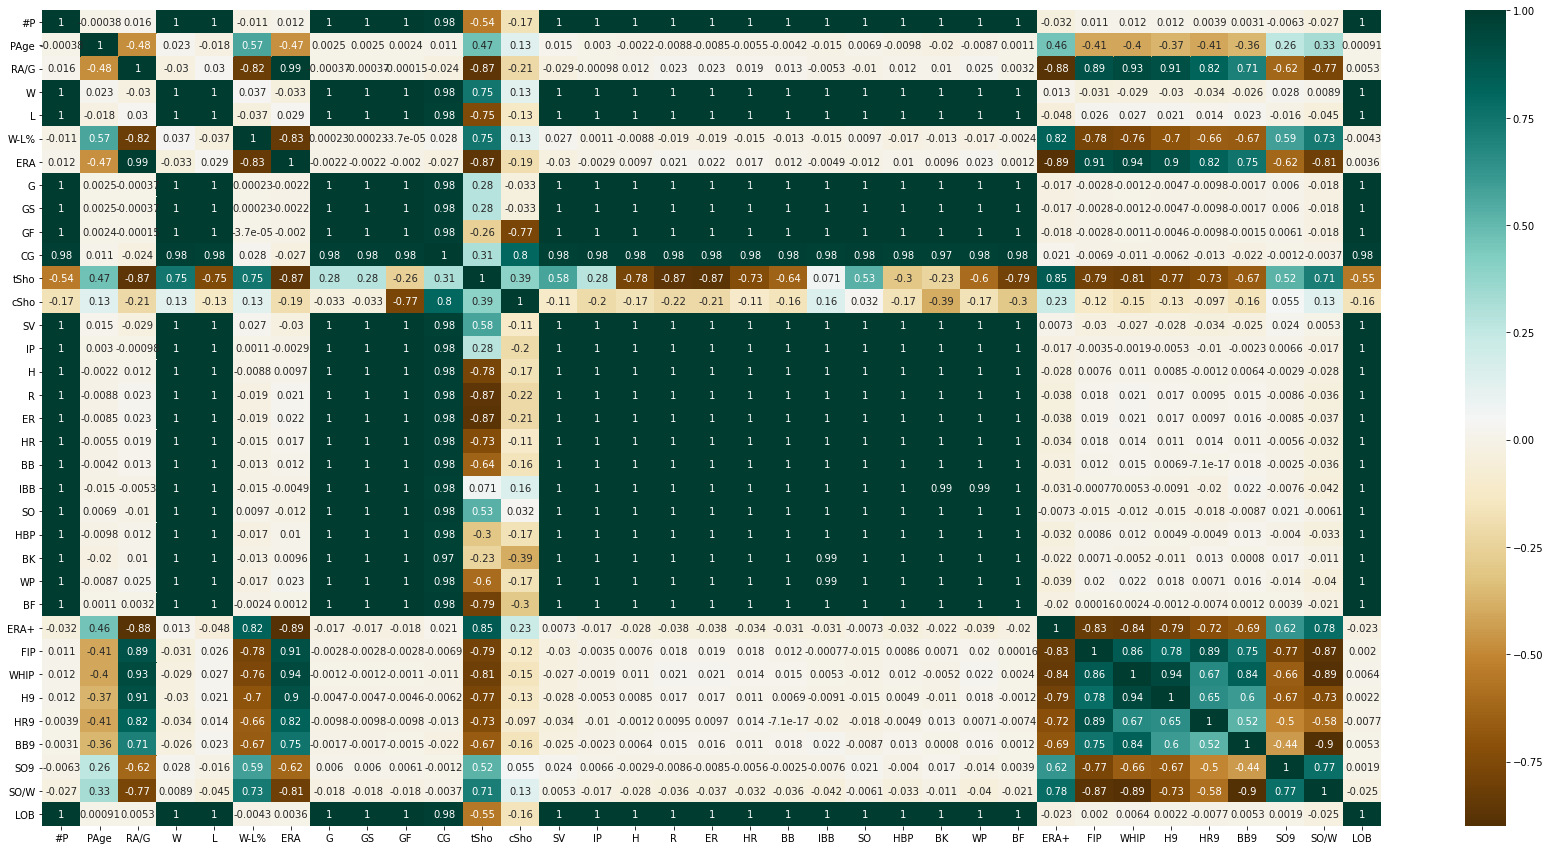

In [15]:
#visualizing the correlation matrix
plt.figure(figsize=(30,15))
sns.heatmap(c,cmap="BrBG", annot=True)

In [16]:
# List of Features that will help train the model
features = ['FIP','WHIP','H9','HR9','BB9','RA/G']

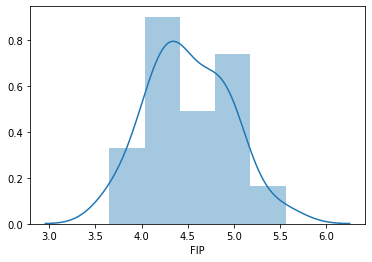

In [17]:
#FIP Distrobution
sns.distplot(pair_df.FIP)

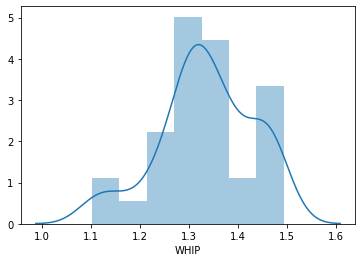

In [18]:
#WHIP Distobution
sns.distplot(pair_df.WHIP)

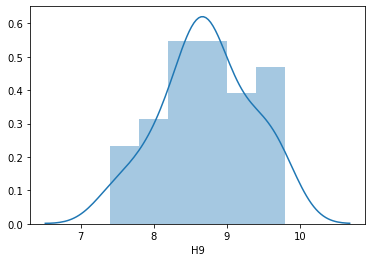

In [19]:
#H9 Distrobution
sns.distplot(pair_df.H9)

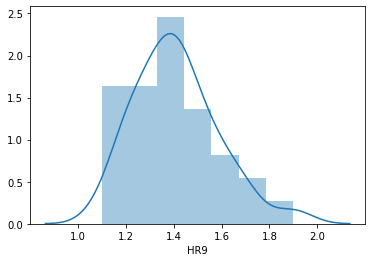

In [20]:
#HR9 Distrobution
sns.distplot(pair_df.HR9)

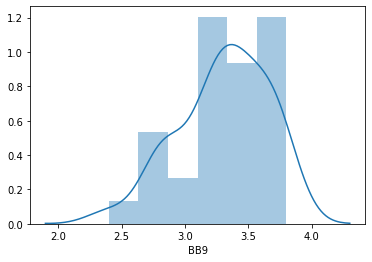

In [21]:
#BB9 Distrobution
sns.distplot(pair_df.BB9)

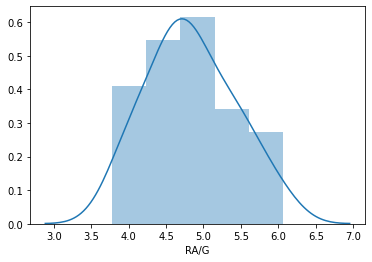

In [22]:
#RA/G Distrobution
sns.distplot(pair_df['RA/G'])

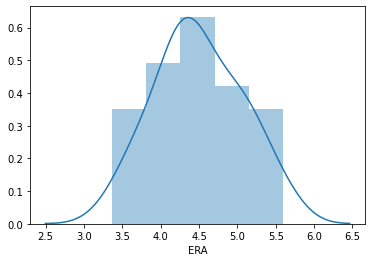

In [23]:
#ERA Distrobution
sns.distplot(pair_df['ERA'])

In [37]:
#Required Imports
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

In [31]:
X = pair_df[features]
y = pair_df.ERA

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20)

In [36]:
# Logistical Regression Pipeline
lr = Pipeline(steps=[('LinReg', LinearRegression())])
lr.fit(X_train, y_train)

lr_preds = lr.predict(X_test)
r2_score(y_test, lr_preds)

0.9769313323839595

In [40]:
#Hyperparameter optimization for DecisionTreeRegressor
parameters = {
    'max_depth':[15,20,30],
}
dtc = Pipeline(steps=[('CV',GridSearchCV(DecisionTreeRegressor(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 30}

In [41]:
# DecisionTrees pipeline 
dt = Pipeline(steps=[('LogReg', DecisionTreeRegressor(max_depth=30))])
dt.fit(X_train,y_train)
dt_preds = dt.predict(X_test)
r2_score(y_test, dt_preds)

0.9481223270256021

In [42]:
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[6,12,15,20],
    'n_estimators':[20,30]
}
rfc = Pipeline([('CV',GridSearchCV(RandomForestRegressor(), parameters, cv = 5))])
rfc.fit(X_train, y_train)
rfc.named_steps['CV'].best_params_

{'max_depth': 12, 'n_estimators': 30}

In [43]:
# RandomForestTrees pipeline 
rf = Pipeline(steps=[('LogReg', RandomForestRegressor(max_depth=12,n_estimators=30))])
rf.fit(X_train,y_train)
rf_preds = rf.predict(X_test)
r2_score(y_test,rf_preds)

0.9276041605639854

# Lets make some predictions on the entire dataset with the LR model, which scored the best out of the 3 models we tested

In [44]:
y_pred = lr.predict(X)

In [51]:
predictions_df = pd.DataFrame({'Real ERA':pair_df.ERA, 'Predicted ERA':y_pred})

In [52]:
predictions_df.head()

,Real ERA,Predicted ERA
0,4.25,4.295886
1,4.19,4.328715
2,5.59,5.725005
3,4.70,4.735468
4,4.10,4.145002


In [53]:
# Exporting Model for later use
import pickle

filename = 'finalized_model.sav'
pickle.dump(lr, open(filename, 'wb'))